### Importing librires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing  & Exploring Data

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


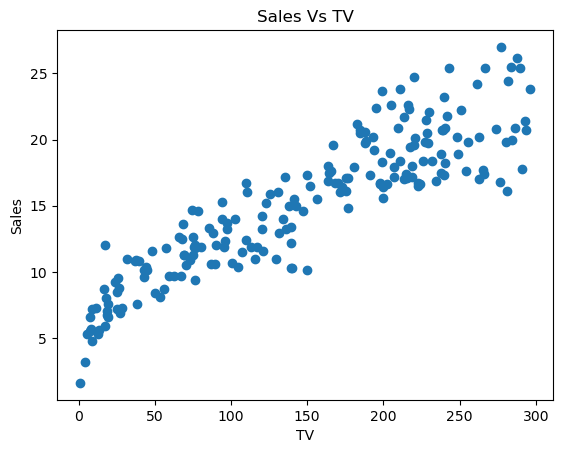

In [6]:
plt.scatter(data = df , x = 'TV' , y = 'Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Sales Vs TV');


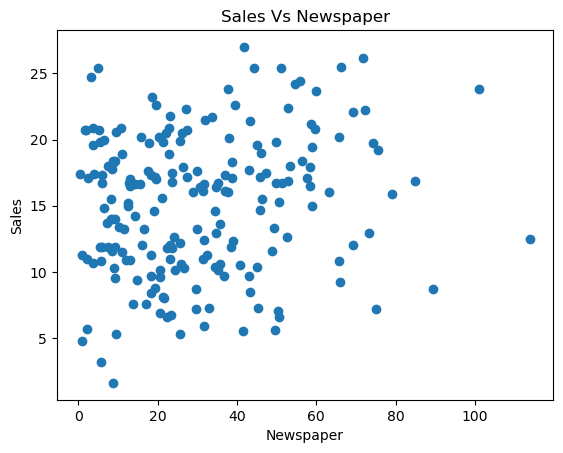

In [7]:
plt.scatter(data = df , x = 'Newspaper' , y = 'Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Sales Vs Newspaper');


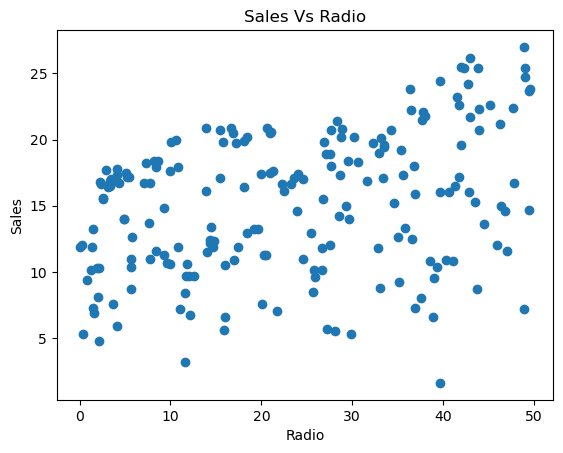

In [8]:
plt.scatter(data = df , x = 'Radio' , y = 'Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Sales Vs Radio');


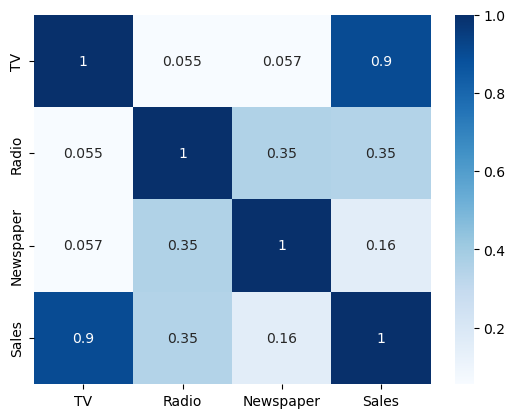

In [9]:
 x = df.corr()
sns.heatmap(x, cmap= "Blues",annot=True);

In [10]:
df[['Newspaper','TV','Radio','Sales']].sum().round(2)

Newspaper     6110.8
TV           29408.5
Radio         4652.8
Sales         3026.1
dtype: float64

In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
con1 = df[df['TV'] == 296.400000]
con1

,TV,Radio,Newspaper,Sales
101,296.4,36.3,100.9,23.8


In [13]:
con2 = df[df['Sales'] == df['Sales'].max()]
con2

,TV,Radio,Newspaper,Sales
175,276.9,48.9,41.8,27.0


In [14]:
X = df.drop(columns = 'Sales')
y = df['Sales']

In [15]:
#import train test split
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression ,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score , confusion_matrix, mean_absolute_error

### Creating a baseline model

In [18]:
baseline_mean = y_train.mean()
baseline_pred = [baseline_mean] * len(y_test)
baseline_pred[:5]
mae = mean_absolute_error(y_test, baseline_pred).round(2)
mae

4.93

In [24]:
model3 = GradientBoostingRegressor()

In [25]:
model3.fit(X_train,y_train)

GradientBoostingRegressor()

In [26]:
prediction3 = model3.predict(X_test)

In [27]:
model3_mae = mean_absolute_error(y_test,prediction3)
model3_mae

0.8286028709728039

### Prediction Function

In [ ]:
dicty = {}
keys = ['TV',"Radio","Newspaper"]
for key in keys:
    values = input(f'Enter an amount  for {key} ')
    dicty[key] = values
    
dff = pd.DataFrame([dicty])
result = model3.predict(dff).round(2)
print('The predicted amount of sales is: ', result[0])